In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Варіант 22

In [70]:
Y = np.array([32, 36, 38, 42, 46, 49, 55, 59, 62, 68, 70, 73, 75, 81, 88, 92, 94, 98])
X = np.array([3.0, 3.5,  4.0, 4.5,  5.0,  6.0,   6.5,  7.0,   7.5,  8.0,   8.5,  9.0,   9.5, 10.0,  10.5, 11.0,  11.5, 12.0])

In [71]:
df = pd.DataFrame({'Y': Y, 'X': X})
df

,Y,X
0,32,3.0
1,36,3.5
2,38,4.0
3,42,4.5
4,46,5.0
5,49,6.0
6,55,6.5
7,59,7.0
8,62,7.5
9,68,8.0


In [72]:
n = df.shape[0]
n

18

In [73]:
y = 0.99

Знайти точкові незміщені статистичні оцінки b0* та b1*

In [74]:
x_b = np.mean(X)
y_b = np.mean(Y)
print(round(x_b, 3), round(y_b, 3))

7.611 64.333


In [75]:
b1 = (np.sum(np.multiply(X, Y)) / n - x_b*y_b) / (np.sum(np.pow(X, 2))/n - x_b**2)
print(round(b1, 4))

7.3789


In [76]:
b0 = y_b - b1*x_b
print(round(b0, 4))

8.172


In [77]:
lin_reg_str = f'y = {b0:.4f} + {b1:.4f}*x'
print('Рівняння регресії:', lin_reg_str)

Рівняння регресії: y = 8.1720 + 7.3789*x


Побудувати на одному малюнку кореляційне поле залежності та графік лінійної регресії

In [78]:
Y1 = b0 + b1*X
Y1

array([30.30855765, 33.99799116, 37.68742467, 41.37685818, 45.06629168,
       52.4451587 , 56.13459221, 59.82402571, 63.51345922, 67.20289273,
       70.89232624, 74.58175974, 78.27119325, 81.96062676, 85.65006027,
       89.33949377, 93.02892728, 96.71836079])

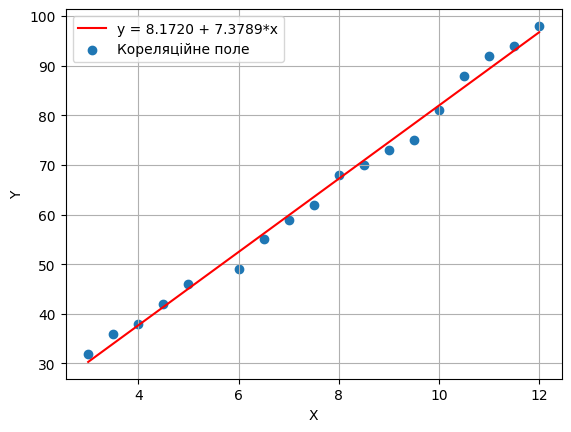

In [79]:
plt.plot(X, Y1, color='r', label=lin_reg_str)
plt.scatter(X, Y, label='Кореляційне поле')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

Побудувати довірчі інтервали для параметрів b1, b2

In [80]:
k = n-2
k

16

In [81]:
a = 1 - y
print(round(a, 4))

0.01


In [82]:
t_crit = stats.t.ppf(1-a/2, k)
print(t_crit)

2.920781622496036


In [83]:
E = Y - (b0 + b1*X)
E

array([ 1.69144235,  2.00200884,  0.31257533,  0.62314182,  0.93370832,
       -3.4451587 , -1.13459221, -0.82402571, -1.51345922,  0.79710727,
       -0.89232624, -1.58175974, -3.27119325, -0.96062676,  2.34993973,
        2.66050623,  0.97107272,  1.28163921])

In [84]:
S2 = np.sum(np.pow(E, 2)) / k
print(S2)

3.4435014061872296


In [85]:
S = np.sqrt(S2)
print(S)

1.8556673748781676


In [86]:
int0_b0 = b0 - t_crit*S*np.sqrt(np.sum(np.pow(X, 2))/(n*np.sum(np.pow(X-x_b, 2))))
int1_b0 = b0 + t_crit*S*np.sqrt(np.sum(np.pow(X, 2))/(n*np.sum(np.pow(X-x_b, 2))))
print(f'{int0_b0:.4f} < b0 < {int1_b0:.4f}')

4.4385 < b0 < 11.9054


In [87]:
int0_b1 = b1 - (t_crit-S)/np.sqrt(n*np.sum(np.pow(X-x_b, 2)))
int1_b1 = b1 + (t_crit-S)/np.sqrt(n*np.sum(np.pow(X-x_b, 2)))
print(f'{int0_b1:.4f} < b1 < {int1_b1:.4f}')

7.3575 < b1 < 7.4002


Перевірити значущість параметра b1

Висунемо гіпотезу H0: b1 = 0 (параметр b1 не значимий) при альтернативній гіпотезі H1: b1 > 0 (параметр b1 значимий) при рівні значущості a = 0.01.

In [88]:
t_b1 = b1 / (S/np.sum(np.pow(X-x_b, 2)))
print(t_b1)

549.8471046840077


In [89]:
if t_b1 > t_crit:
    print('Оскільки t_спост > t_крит, то гіпотеза H0 відхиляється. Параметр b1 є значущим при a = 0.01.')
else:
    print('Оскільки t_спост < t_крит, то гіпотезу H0 не відхиляємо. Параметр b1 не є значущим при a = 0.01.')

Оскільки t_спост > t_крит, то гіпотеза H0 відхиляється. Параметр b1 є значущим при a = 0.01.


Побудувати довірчий інтервал для функції регресії та зобразити графічно

In [117]:
D = S2 * (1/n + np.pow(X-x_b, 2)/np.sum(np.pow(X-x_b, 2)))
D

array([0.7207972 , 0.6121934 , 0.51604099, 0.43233997, 0.36109034,
       0.25594526, 0.22204981, 0.20060575, 0.19161308, 0.1950718 ,
       0.21098191, 0.23934341, 0.2801563 , 0.33342059, 0.39913626,
       0.47730333, 0.56792179, 0.67099164])

In [118]:
sigma = np.sqrt(D)
sigma

array([0.84899776, 0.78242789, 0.71835993, 0.65752564, 0.60090793,
       0.50591033, 0.47122161, 0.44789033, 0.43773631, 0.44166933,
       0.45932767, 0.48922736, 0.52929793, 0.57742583, 0.63177232,
       0.69087143, 0.75360586, 0.81914079])

In [119]:
int0 = b0 + b1*X - t_crit*sigma
int0

array([27.82882059, 31.71269017, 35.58925218, 39.45636936, 43.31117083,
       50.9675051 , 54.75825678, 58.51583587, 62.23492706, 65.91287307,
       69.55073043, 73.15283346, 76.72522958, 80.27409201, 83.80479129,
       87.3216092 , 90.82780914, 94.32582942])

In [120]:
int1 = b0 + b1*X + t_crit*sigma
int1

array([32.78829472, 36.28329216, 39.78559715, 43.29734699, 46.82141253,
       53.9228123 , 57.51092764, 61.13221556, 64.79199138, 68.49291238,
       72.23392205, 76.01068602, 79.81715693, 83.6471615 , 87.49532924,
       91.35737834, 95.23004542, 99.11089216])

In [121]:
for i in range(n):
    print(f'{int0[i]:.4f} < b0 + b1*x < {int1[i]:.4f}')

27.8288 < b0 + b1*x < 32.7883
31.7127 < b0 + b1*x < 36.2833
35.5893 < b0 + b1*x < 39.7856
39.4564 < b0 + b1*x < 43.2973
43.3112 < b0 + b1*x < 46.8214
50.9675 < b0 + b1*x < 53.9228
54.7583 < b0 + b1*x < 57.5109
58.5158 < b0 + b1*x < 61.1322
62.2349 < b0 + b1*x < 64.7920
65.9129 < b0 + b1*x < 68.4929
69.5507 < b0 + b1*x < 72.2339
73.1528 < b0 + b1*x < 76.0107
76.7252 < b0 + b1*x < 79.8172
80.2741 < b0 + b1*x < 83.6472
83.8048 < b0 + b1*x < 87.4953
87.3216 < b0 + b1*x < 91.3574
90.8278 < b0 + b1*x < 95.2300
94.3258 < b0 + b1*x < 99.1109


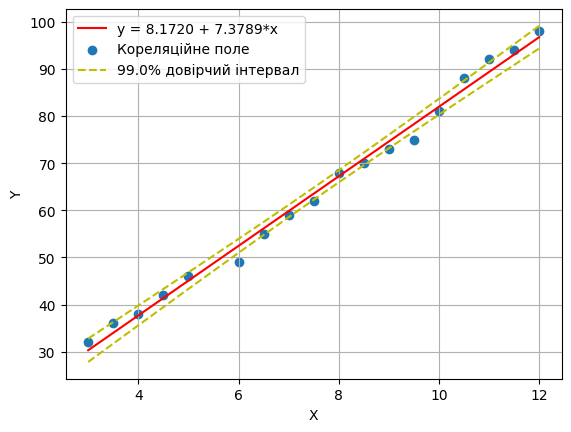

In [122]:
plt.plot(X, Y1, color='r', label=lin_reg_str)
plt.scatter(X, Y, label='Кореляційне поле')

plt.plot(X, int0, color='y', linestyle='--', label=f'{y*100}% довірчий інтервал')
plt.plot(X, int1, color='y', linestyle='--')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

Обчислити парний коефіцієнт кореляції

In [102]:
sigma_x = np.sqrt(np.sum(np.pow(X, 2))/n - np.pow(x_b, 2))
sigma_y = np.sqrt(np.sum(np.pow(Y, 2))/n - np.pow(y_b, 2))
cov_xy = np.sum(X*Y)/ n - x_b*y_b

r_xy = cov_xy / (sigma_x * sigma_y)
print(round(r_xy, 4))

0.9964


Побудувати довірчий інтервал для прогнозованих індивідуальних значень та зобразити його графічно

In [97]:
S_p = S*np.sqrt(1 + 1/n + np.pow(X-x_b, 2)/np.sum(np.pow(X-x_b, 2)))
print(S_p)

[2.04066132 2.01387557 1.98985989 1.96871567 1.95053627 1.92339457
 1.91456293 1.90895447 1.90659762 1.90750444 1.91167029 1.91907395
 1.92967814 1.94343047 1.96026469 1.9801022  2.00285376 2.02842132]


In [98]:
int0 = b0 + b1*X - t_crit*S_p
int0

array([24.34823158, 28.11590041, 31.87547846, 35.62666964, 39.36920118,
       46.82734319, 50.54257198, 54.24838659, 57.94470393, 61.63148881,
       65.30875477, 68.97656383, 72.63502481, 76.28429076, 79.92455517,
       83.55604765, 87.17902882, 90.79378508])

In [99]:
int1 = b0 + b1*X + t_crit*S_p
int1

array([ 36.26888372,  39.88008191,  43.49937088,  47.12704672,
        50.76338218,  58.06297421,  61.72661243,  65.39966484,
        69.08221451,  72.77429665,  76.4758977 ,  80.18695566,
        83.90736169,  87.63696276,  91.37556536,  95.1229399 ,
        98.87882574, 102.64293649])

In [100]:
for i in range(n):
    print(f'{int0[i]:.4f} < b0 + b1*x < {int1[i]:.4f}')

24.3482 < b0 + b1*x < 36.2689
28.1159 < b0 + b1*x < 39.8801
31.8755 < b0 + b1*x < 43.4994
35.6267 < b0 + b1*x < 47.1270
39.3692 < b0 + b1*x < 50.7634
46.8273 < b0 + b1*x < 58.0630
50.5426 < b0 + b1*x < 61.7266
54.2484 < b0 + b1*x < 65.3997
57.9447 < b0 + b1*x < 69.0822
61.6315 < b0 + b1*x < 72.7743
65.3088 < b0 + b1*x < 76.4759
68.9766 < b0 + b1*x < 80.1870
72.6350 < b0 + b1*x < 83.9074
76.2843 < b0 + b1*x < 87.6370
79.9246 < b0 + b1*x < 91.3756
83.5560 < b0 + b1*x < 95.1229
87.1790 < b0 + b1*x < 98.8788
90.7938 < b0 + b1*x < 102.6429


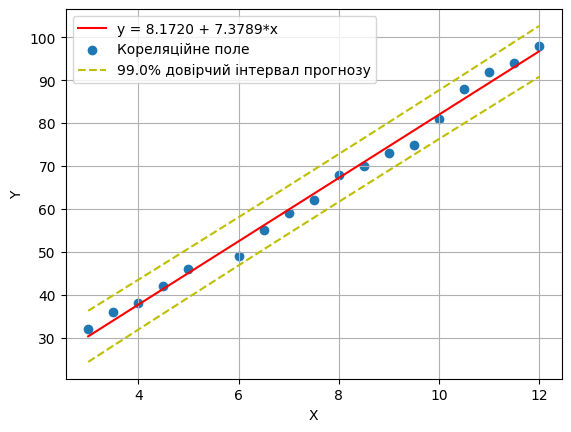

In [101]:
plt.plot(X, Y1, color='r', label=lin_reg_str)
plt.scatter(X, Y, label='Кореляційне поле')

plt.plot(X, int0, color='y', linestyle='--', label=f'{y*100}% довірчий інтервал прогнозу')
plt.plot(X, int1, color='y', linestyle='--')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()